In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib.ticker import ScalarFormatter
from sklearn.preprocessing import PolynomialFeatures
from fbprophet import Prophet
from scipy.stats import norm
from scipy.integrate import odeint
from sklearn.metrics import mean_squared_error 

%matplotlib inline


Bad key "backend.qt4" on line 43 in
/etc/matplotlib/matplotlibrc.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.2/matplotlibrc.template
or from the matplotlib source distribution
Importing plotly failed. Interactive plots will not work.


In [2]:
# confirmed_url = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
# deaths_url = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
# recoverd_url = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"

df_confirmed = pd.read_csv('Analysis/df_confirmed.csv')
df_deaths = pd.read_csv('Analysis/df_deaths.csv')
df_recovered = pd.read_csv('Analysis/df_recovered.csv')

In [3]:
curve = pd.read_csv('normalCurve.csv')

In [4]:
curve.iloc[120:140]

,Unnamed: 0,Actual New Cases,Date,Predicted New Cases
120,120,190823.0,2020-06-30,3600
121,121,194225.0,2020-07-01,3586
122,122,197608.0,2020-07-02,3570
123,123,201801.0,2020-07-03,3551
124,124,205929.0,2020-07-04,3530
125,125,209509.0,2020-07-05,3506
126,126,213716.0,2020-07-06,3481
127,127,217108.0,2020-07-07,3453
128,128,220144.0,2020-07-08,3422
129,129,223327.0,2020-07-09,3390


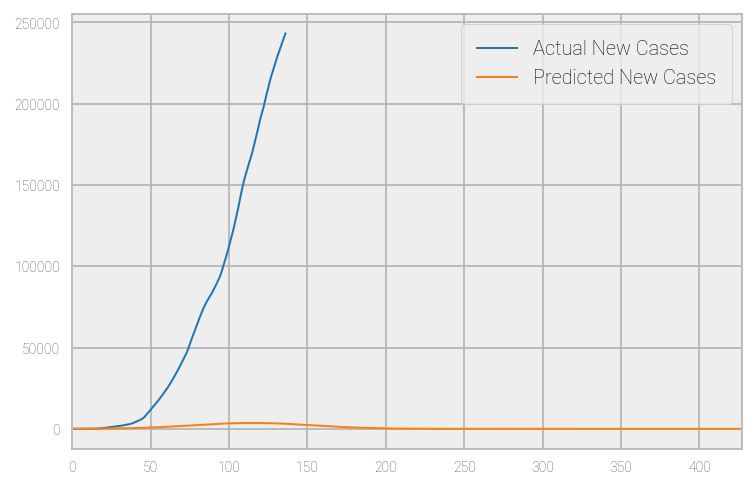

In [5]:
curve[['Actual New Cases','Date','Predicted New Cases']].plot()

In [6]:
df_deaths

,Unnamed: 0,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20
0,0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,...,807,819,826,864,898,920,936,957,971,994
1,1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,...,69,72,74,76,79,81,83,83,85,89
2,2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,...,928,937,946,952,959,968,978,988,996,1004
3,3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52
4,4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,...,17,18,19,19,19,21,21,22,23,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,261,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,...,13,13,13,13,13,13,13,14,14,14
262,262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,...,325,335,337,338,345,348,351,361,364,365
263,263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
264,264,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,...,52,52,52,53,53,53,54,54,55,55


In [7]:
df_recovered

,Unnamed: 0,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20
0,0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,...,16041,17331,19164,19366,20103,20179,20700,20847,20882,21135
1,1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,...,1559,1592,1637,1657,1702,1744,1791,1832,1875,1881
2,2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,...,10342,10832,11181,11492,11884,12094,12329,12637,13124,13124
3,3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,...,800,800,800,800,800,800,802,802,803,803
4,4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,...,97,107,108,108,108,117,117,117,117,118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,248,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,...,260,267,267,268,269,279,283,283,284,284
249,249,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,...,513,536,537,552,575,591,595,619,630,642
250,250,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,...,200,241,241,266,266,266,272,272,272,296
251,251,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,...,4690,4690,4809,4858,4914,4965,5011,5067,5115,5176


In [8]:
df_confirmed_sa=df_confirmed.loc[df_confirmed['Country/Region'].str.lower() == 'saudi arabia']
df_recovered_sa=df_recovered.loc[df_recovered['Country/Region'].str.lower() == 'saudi arabia']
df_deaths_sa=df_deaths.loc[df_deaths['Country/Region'].str.lower() == 'saudi arabia']

In [9]:
df_confirmed_sa

,Unnamed: 0,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20
192,192,NaN,Saudi Arabia,23.885942,45.079162,0,0,0,0,0,...,217108,220144,223327,226486,229480,232259,235111,237803,240474,243238


In [10]:
df_recovered_sa

,Unnamed: 0,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20
190,190,NaN,Saudi Arabia,24.0,45.0,0,0,0,0,0,...,137669,140614,143256,145236,149634,154839,158050,161096,163026,165396


In [11]:
df_deaths_sa

,Unnamed: 0,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20
192,192,NaN,Saudi Arabia,24.0,45.0,0,0,0,0,0,...,1752,1802,1858,1916,1968,2017,2059,2100,2151,2181


In [12]:
df_confirmed_saT=df_confirmed_sa.T[5:]
df_confirmed_saT=df_confirmed_saT.rename(columns={df_confirmed_saT.columns[0]: 'Confirmed'})

df_recovered_saT=df_recovered_sa.T[5:]
df_recovered_saT=df_recovered_saT.rename(columns={df_recovered_saT.columns[0]: 'Recovered'})

df_deaths_saT=df_deaths_sa.T[5:]
df_deaths_saT=df_deaths_saT.rename(columns={df_deaths_saT.columns[0]: 'Deaths'})

In [13]:
result = pd.concat([df_confirmed_saT,df_recovered_saT,df_deaths_saT], axis=1, sort=False)

result['active'] = result['Confirmed'] - result['Deaths'] - result['Recovered']

In [14]:
result["new_cases"] = result["Confirmed"].diff()
result["new_Recovered"] = result["Recovered"].diff()

In [15]:
result.index.names = ['Date']
result=result.reset_index()
# result=result.rename(columns={result.columns[0]: 'Confirmed', result.columns[1]: 'Deaths', result.columns[2]: 'Recovered' })

In [16]:
result

,Date,Confirmed,Recovered,Deaths,active,new_cases,new_Recovered
0,1/22/20,0,0,0,0,NaN,NaN
1,1/23/20,0,0,0,0,0,0
2,1/24/20,0,0,0,0,0,0
3,1/25/20,0,0,0,0,0,0
4,1/26/20,0,0,0,0,0,0
...,...,...,...,...,...,...,...
172,7/12/20,232259,NaN,NaN,NaN,2779,NaN
173,7/13/20,235111,NaN,NaN,NaN,2852,NaN
174,7/14/20,237803,NaN,NaN,NaN,2692,NaN
175,7/15/20,240474,NaN,NaN,NaN,2671,NaN


Text(0, 0.5, 'Number of cases')

<Figure size 432x288 with 0 Axes>

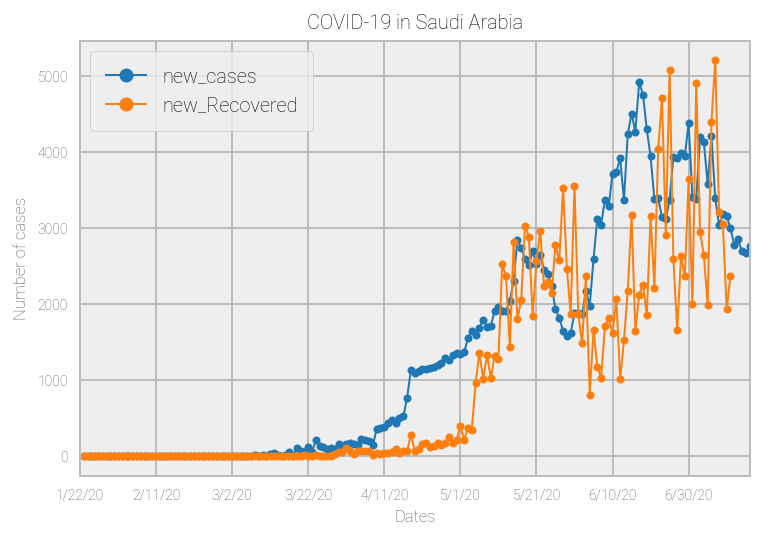

In [17]:
fig = plt.figure()
result.set_index('Date')[['new_cases','new_Recovered']].plot(style='.-',legend=True, grid=True)
plt.title("COVID-19 in Saudi Arabia")
plt.xlabel("Dates")
plt.ylabel("Number of cases")

In [18]:
result["Date"]= pd.to_datetime(result["Date"]) 

In [19]:
def plot(x, y, realX, realY, name):
    df = pd.DataFrame({'date': X, 'Confirmed': y.astype(np.int32)})
    df['date'] = pd.to_datetime(df['date'])

    fig = plt.figure()
    ax = plt.axes()
    plt.plot(realX, realY, 'r', alpha=1 ,label='Confirmed Cases')
    df.set_index('date')['Confirmed'].plot(legend=True, grid=True, alpha=0.5,label='Predicted Cases')
    plt.title("COVID-19 in Saudi Arabia ("+name+")")
    plt.xlabel("Date")
    plt.ylabel("Number of cases")
    
    h1 =mpatches.Patch(color='blue', label='Predicted Cases')
    h2 = mpatches.Patch(color='red', label='Confirmed Cases')
    plt.legend(handles=[h1, h2])

In [20]:
import datetime

days = 60
dfConfirmed = result[result['Confirmed'] != 0]

Xdata = np.arange(0, len(dfConfirmed['Date']))
Ydata = dfConfirmed['Confirmed']

predictX = np.arange(0, len(Xdata) + days)

xCases = dfConfirmed['Date']
yCases = dfConfirmed['Confirmed']

predictedDays = pd.date_range(dfConfirmed['Date'].iloc[-1] + datetime.timedelta(days=1), periods=days, freq='D')
X = np.append(dfConfirmed['Date'], predictedDays)

In [21]:
# 
# ! pip3 install fbprophet

In [22]:
polynomialFeatures = PolynomialFeatures(degree = 2)
XPoly = polynomialFeatures.fit_transform(Xdata.reshape(-1, 1))

from sklearn.linear_model import LinearRegression
polyLinearRegression = LinearRegression()
polyLinearRegression.fit(XPoly, Ydata)

XPoly = polynomialFeatures.fit_transform(predictX.reshape(-1, 1))
y = polyLinearRegression.predict(XPoly).astype(int)
miny = min(y)
y = y + miny * -1

In [23]:
dfConfirmed

,Date,Confirmed,Recovered,Deaths,active,new_cases,new_Recovered
40,2020-03-02,1,0,0,1,1,0
41,2020-03-03,1,0,0,1,0,0
42,2020-03-04,1,0,0,1,0,0
43,2020-03-05,5,0,0,5,4,0
44,2020-03-06,5,0,0,5,0,0
...,...,...,...,...,...,...,...
172,2020-07-12,232259,NaN,NaN,NaN,2779,NaN
173,2020-07-13,235111,NaN,NaN,NaN,2852,NaN
174,2020-07-14,237803,NaN,NaN,NaN,2692,NaN
175,2020-07-15,240474,NaN,NaN,NaN,2671,NaN


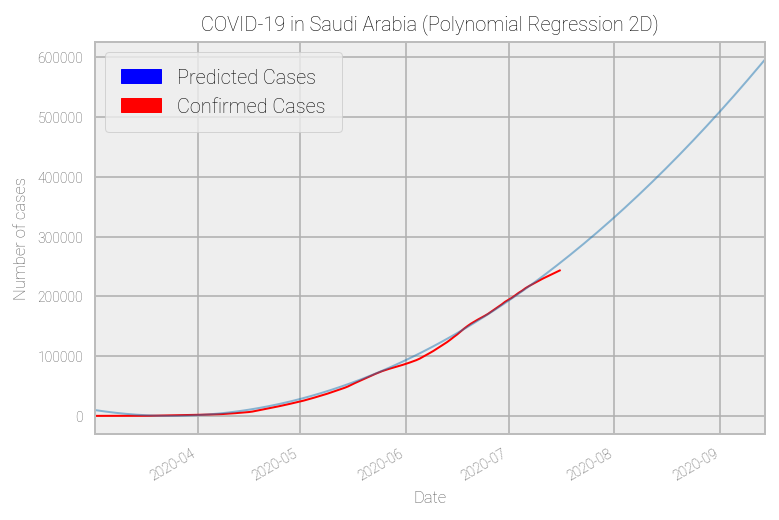

In [24]:
plot(X, y, xCases, yCases, "Polynomial Regression 2D")

In [25]:
import matplotlib
def plotseir(t, S, I, R, XReal, yReal, E=None):
    f, ax = plt.subplots(1,1,figsize=(15,10))
    num = [1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000,9000000,10000000]
    ax.plot(t, S, 'w', alpha=0.7, linewidth=2)
    #if E is not None:
     #   ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
    ax.plot(t, I, 'b', alpha=1., linewidth=2, label='Predicted')
    ax.plot(XReal, yReal, 'r', alpha=0.9, lw=2, label='Actual')

    ax.plot(t, R, 'w', alpha=0.01, linewidth=2)

    ax.set_xlabel('Time (days)')

    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    ax.set_ylim(0,10000000)
    y_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
#     matplotlib.rcParams['axes.formatter.useoffset'] = False
    ax.yaxis.set_major_formatter(y_formatter)
    
    legend = ax.legend(borderpad=2.0)
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    
    plt.yticks();

In [26]:
dfConfirmed['Date'][:10]
# dfConfirmed['Date'].index(10)

40   2020-03-02
41   2020-03-03
42   2020-03-04
43   2020-03-05
44   2020-03-06
45   2020-03-07
46   2020-03-08
47   2020-03-09
48   2020-03-10
49   2020-03-11
Name: Date, dtype: datetime64[ns]

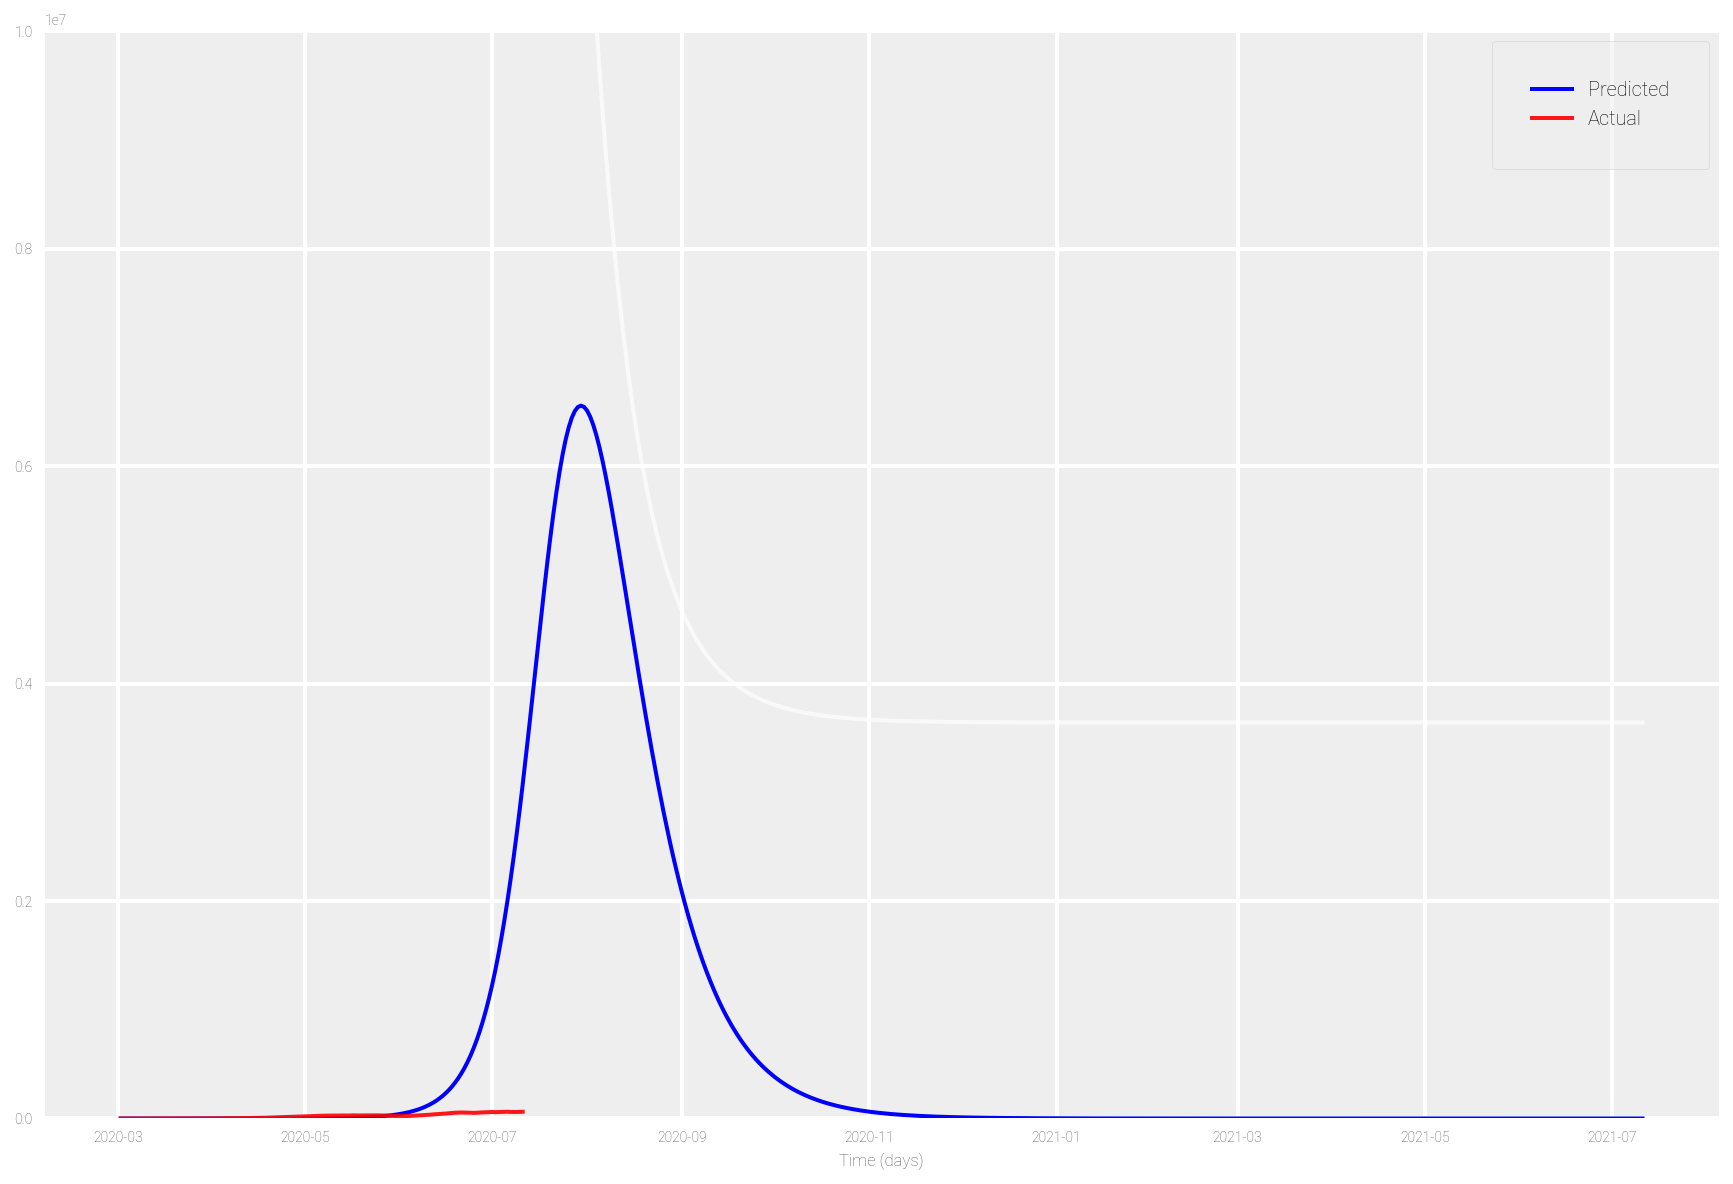

In [27]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import datetime

days = 360

dfConfirmed = result[result['active'] != 0]

xCases = dfConfirmed['Date']
yCases = dfConfirmed['active']

predictedDays = pd.date_range(dfConfirmed['Date'].iloc[-1] + datetime.timedelta(days=1), periods=days, freq='D')
X = np.append(dfConfirmed['Date'], predictedDays)


# Total population, N.
N = 30000000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = dfConfirmed['active'].iloc[0], dfConfirmed['Recovered'].iloc[0] 
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = .2, 1./12

# A grid of time points (in days)
t = np.linspace(0, len(X), len(X))
# n_days = 100
# t = np.linspace(0, n_days, n_days)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T
plotseir(X, S, I, R,xCases,yCases)

# matplotlib.rcParams['axes.formatter.useoffset'] = False
# plt.rcParams["figure.figsize"] = [15, 10]
# # plotGraph(X, I, XRealCases, yRealCases, "SIR")
# fig = plt.figure(facecolor='w')
# ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
# ax.plot(X, S/30000000, 'b', alpha=0.5, lw=2, label='Susceptible')
# ax.plot(X, I/30000000, 'r', alpha=0.5, lw=2, label='Infected')
# ax.plot(X, R/30000000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
# ax.plot(xCases, yCases/30000000, 'r', alpha=0.5, lw=2, label='Actual')
# ax.set_xlabel('Time /days')
# ax.set_ylabel('Number (30,000,000)')
# # ax.set_ylim(0,1.2)
# ax.yaxis.set_tick_params(length=0)
# ax.xaxis.set_tick_params(length=0)
# ax.grid(b=True, which='major', c='w', lw=2, ls='-')
# legend = ax.legend()
# legend.get_frame().set_alpha(0.5)
# for spine in ('top', 'right', 'bottom', 'left'):
#     ax.spines[spine].set_visible(False)
# plt.show()

In [28]:
# The SEIR model differential equations.
def deriv2(y, t, N, beta, gamma, delta):
    S, E, I, R = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - delta * E
    dIdt = delta * E - gamma * I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dRdt

In [29]:
N = 30000000 # population
beta = .15  # infected person infects 1 other person per day
D = 14 # infections lasts 10 days
gamma = 1.0 / D
delta = 1.0 / 5.2  # incubation period of  days

#  initial conditions: one exposed, rest susceptible
I0, R0 , E0 = dfConfirmed['active'].iloc[0], 0, 1

S0 = N - I0 - R0 - E0

(29999998, 1, 1, 0)


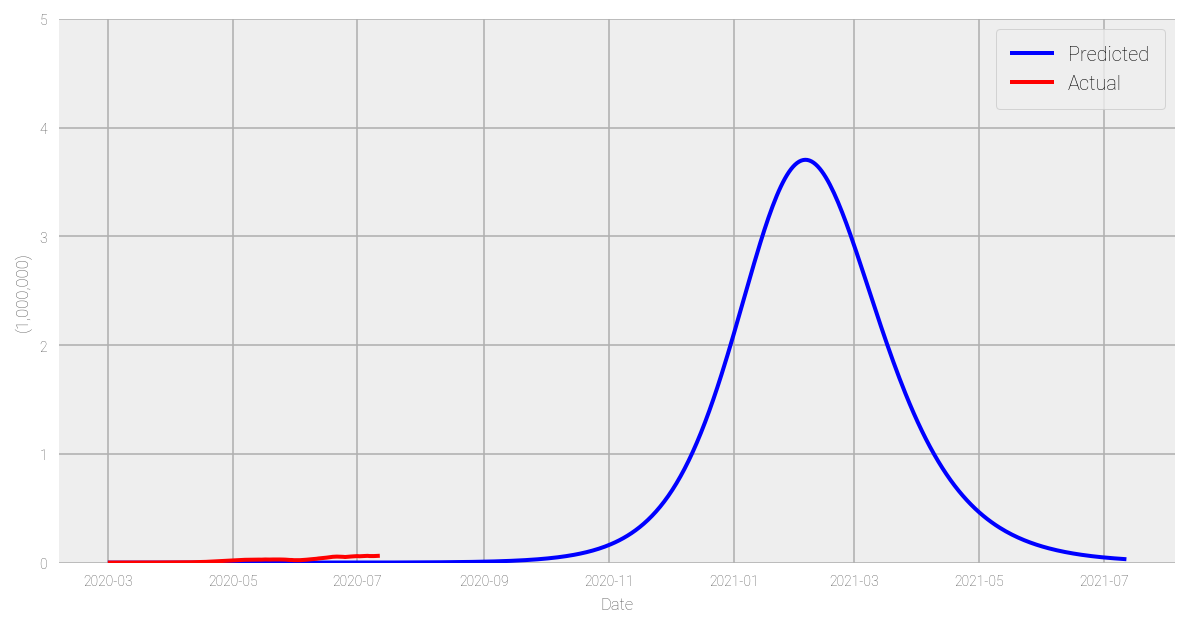

In [30]:
y0 = S0, E0, I0, R0 # Initial conditions vector
print(y0)
t = np.linspace(0, (len(X)), (len(X)))
# print(t)
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv2, y0, t, args=(N, beta, gamma, delta))
S, E, I, R = ret.T



plt.rcParams["figure.figsize"] = [10, 5]
# plotGraph(X, I, XRealCases, yRealCases, "SIR")
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111,  axisbelow=True)
# ax.plot(X, S/1000000, 'w',  )
ax.plot(X, I/1000000, 'b', alpha=1., lw=2, label='Predicted')
# ax.plot(X, R/1000000, 'w',  )
ax.plot(xCases, yCases/1000000, 'r', alpha=1., lw=2, label='Actual')
ax.set_xlabel('Date')
ax.set_ylabel('(1,000,000)')
# matplotlib.rcParams['axes.formatter.useoffset'] = False
y_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
ax.yaxis.set_major_formatter(y_formatter)

ax.set_ylim(0,5)
# ax.yaxis.set_tick_params(length=0)
# ax.xaxis.set_tick_params(length=0)
# ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
# legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

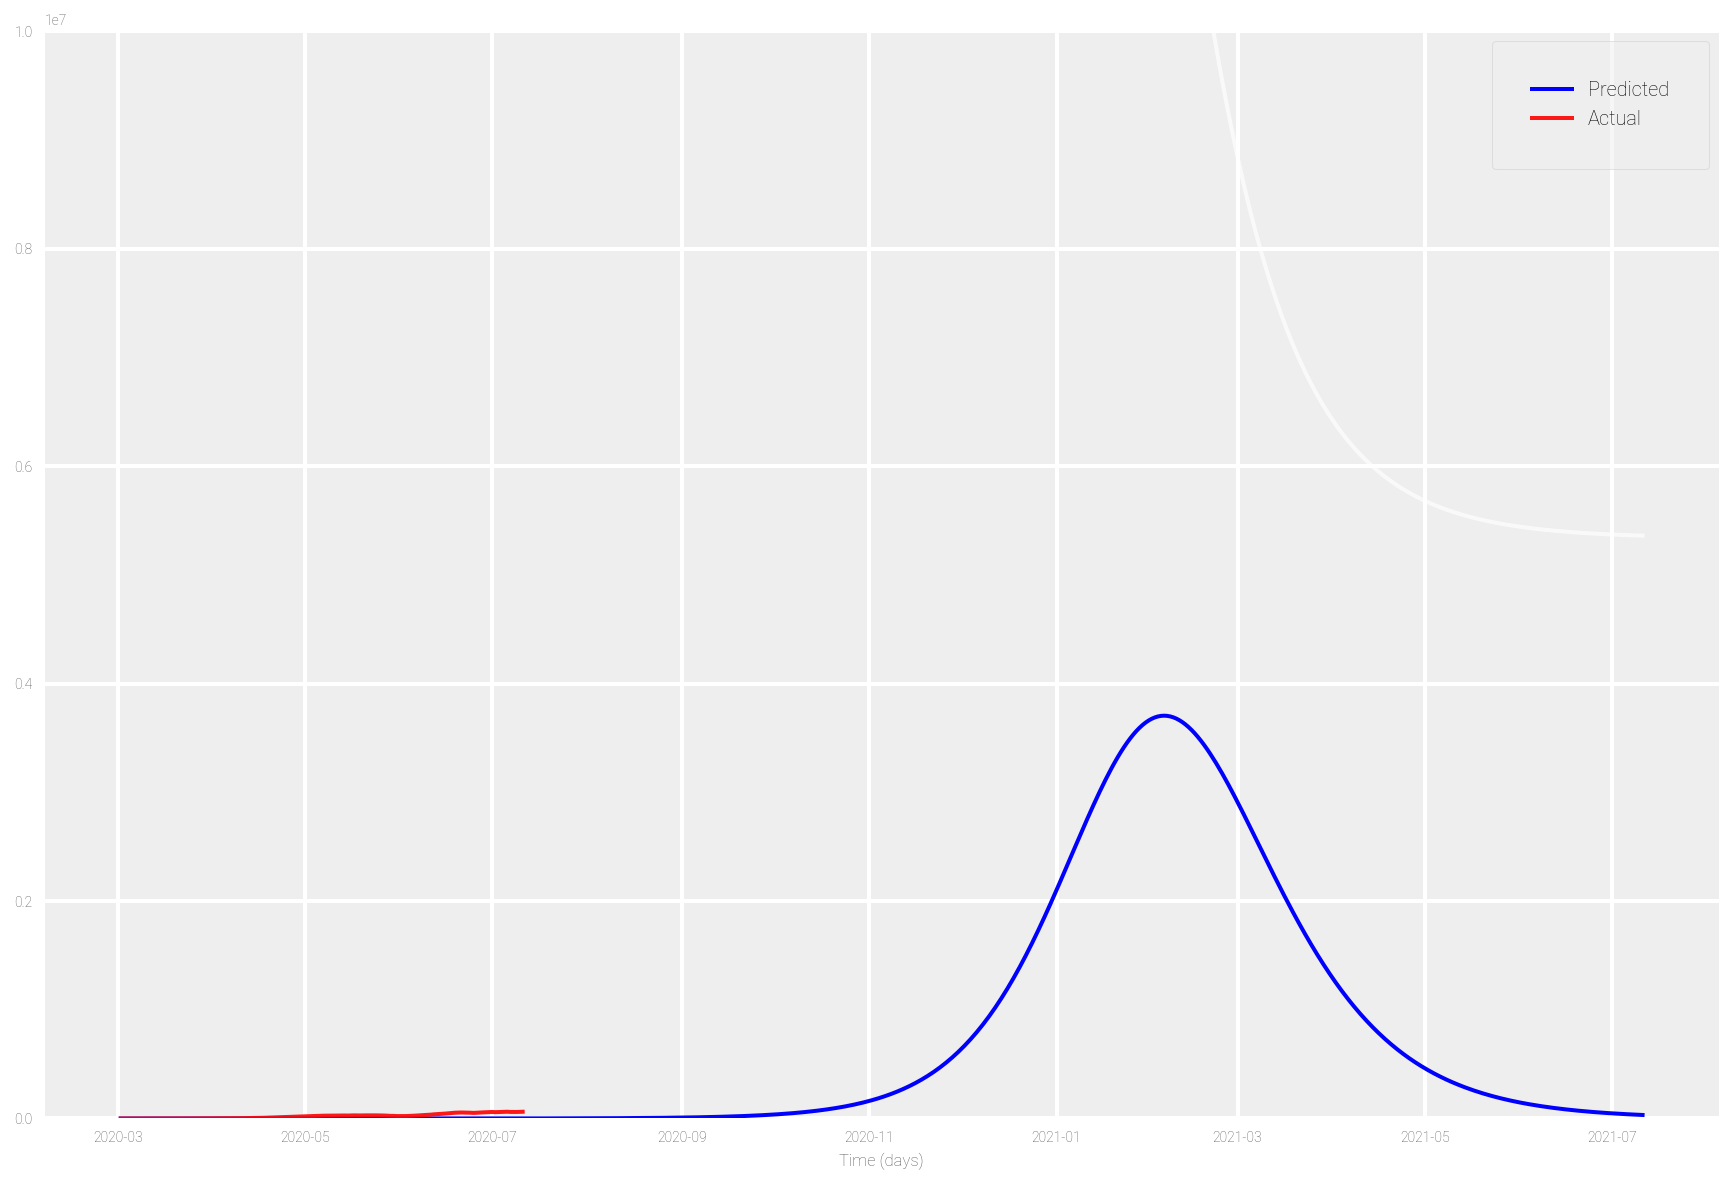

In [31]:
plotseir(X, S, I, R,xCases,yCases,E)

In [32]:
confirmed = dfConfirmed[['Date','Confirmed']]
confirmed["Date"]= pd.to_datetime(confirmed["Date"]) 
confirmed=confirmed.rename(columns={confirmed.columns[0]: 'ds', confirmed.columns[1]: 'y'})

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [33]:
confirmed

,ds,y
40,2020-03-02,1
41,2020-03-03,1
42,2020-03-04,1
43,2020-03-05,5
44,2020-03-06,5
...,...,...
172,2020-07-12,232259
173,2020-07-13,235111
174,2020-07-14,237803
175,2020-07-15,240474


In [34]:
prediction_size = 7
train_df = confirmed[:-prediction_size]
train_df.tail()

,ds,y
165,2020-07-05,209509
166,2020-07-06,213716
167,2020-07-07,217108
168,2020-07-08,220144
169,2020-07-09,223327


In [35]:
m = Prophet()
m.fit(confirmed)
future = m.make_future_dataframe(periods=14)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
146,2020-07-26
147,2020-07-27
148,2020-07-28
149,2020-07-29
150,2020-07-30


In [36]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
139,2020-07-19,258087.820233,256973.294703,259134.037730
140,2020-07-20,261724.169355,260417.684189,262854.710866
141,2020-07-21,265266.949107,263821.565658,266747.259435
142,2020-07-22,268742.477423,267183.590359,270454.891825
143,2020-07-23,272230.545638,270235.072869,274180.730144
144,2020-07-24,276086.456629,273824.619564,278544.840825
145,2020-07-25,279675.158365,277002.806810,282579.699928
146,2020-07-26,283296.221636,280031.684881,286819.506838
147,2020-07-27,286932.570758,283346.882877,290796.522848
148,2020-07-28,290475.350510,286215.053402,294895.600046


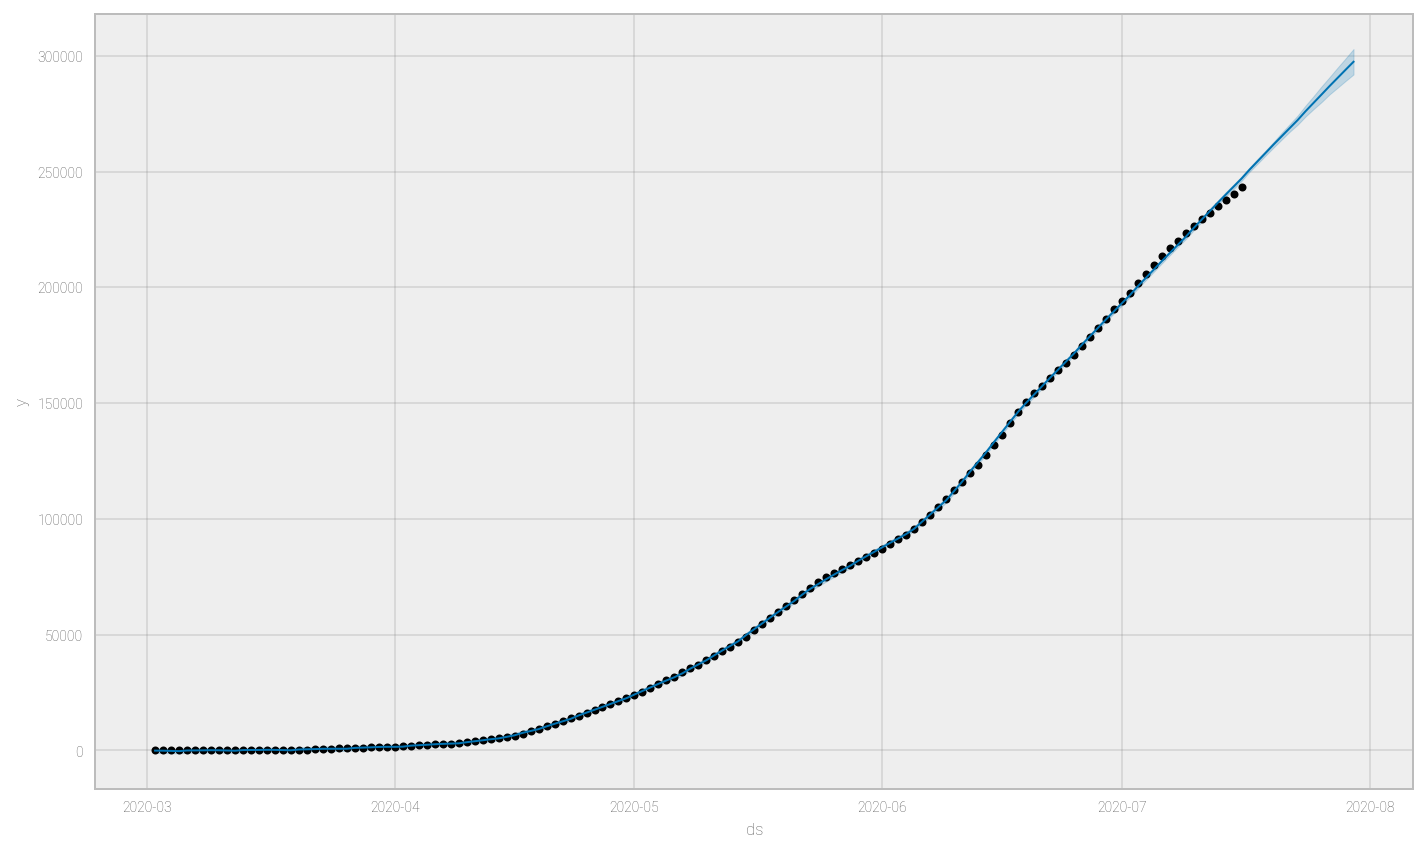

In [37]:
fig1 = m.plot(forecast)
# plotGraph(forecast['ds'], forecast['yhat'], XRealCases, yRealCases, "prophet")

In [38]:
# plotGraph(forecast['ds'], forecast['yhat'], XRealCases, yRealCases, "prophet")

In [39]:
def make_comparison_dataframe(historical, forecast):
    """Join the history with the forecast.
    
       The resulting dataset will contain columns 'yhat', 'yhat_lower', 'yhat_upper' and 'y'.
    """
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

In [40]:
cmp_df = make_comparison_dataframe(confirmed, forecast)
cmp_df.tail(10)

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2020-07-21,265266.949107,263821.565658,266747.259435,NaN
2020-07-22,268742.477423,267183.590359,270454.891825,NaN
2020-07-23,272230.545638,270235.072869,274180.730144,NaN
2020-07-24,276086.456629,273824.619564,278544.840825,NaN
2020-07-25,279675.158365,277002.806810,282579.699928,NaN
2020-07-26,283296.221636,280031.684881,286819.506838,NaN
2020-07-27,286932.570758,283346.882877,290796.522848,NaN
2020-07-28,290475.350510,286215.053402,294895.600046,NaN
2020-07-29,293950.878826,289139.199811,298856.301514,NaN


In [41]:
def calculate_forecast_errors(df, prediction_size):
    """Calculate MAPE and MAE of the forecast.
    
       Args:
           df: joined dataset with 'y' and 'yhat' columns.
           prediction_size: number of days at the end to predict.
    """
    
    # Make a copy
    df = df.copy()
    index=pd.isnull(cmp_df).any(1).nonzero()[0][0]
    df = df[:index]
#     df = df[df['y'] is not None]
    # Now we calculate the values of e_i and p_i according to the formulas given in the article above.
    df['e'] = df['y'] - df['yhat']
    df['p'] = 100 * df['e'] / df['y'] 
    
    # Now cut out the part of the data which we made our prediction for.
    predicted_part = df[-prediction_size:]
    
    # Define the function that averages absolute error values over the predicted part.
    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))
    
    # Now we can calculate MAPE and MAE and return the resulting dictionary of errors.
    return {'MAPE': error_mean('p'), 'MAE': error_mean('e')}

In [42]:
for err_name, err_value in calculate_forecast_errors(cmp_df, prediction_size).items():
    print(err_name, err_value)

MAPE 0.7283415074051118
MAE 1737.5636225642063


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  # This is added back by InteractiveShellApp.init_path()


In [43]:
# import numpy as np
# from scipy.stats import norm
# import matplotlib.pyplot as plt



# # Generate some data for this demonstration.
# # data = norm.rvs(dfConfirmed['new_cases'])
# data = np.array(dfConfirmed['new_cases'], dtype=float)
# # Fit a normal distribution to the data:
# mu, std = norm.fit(data)

# # Plot the histogram.
# plt.hist(data, bins=50, density=True, alpha=0.6, color='g')

# # Plot the PDF.
# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 100)
# p = norm.pdf(x, mu, std)
# plt.plot(x, p, 'k', linewidth=2)
# title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
# plt.title(title)

# plt.show()

In [44]:
data = np.array(result['new_cases'], dtype = float)
data[0] = 0

mu, std = norm.fit(data)

print(mu,std)
# type (dfConfirmed['new_cases'].values)
# dfConfirmed['new_cases'].values
# data

1374.225988700565 1475.7384955069774


In [45]:
'''
Gaussian function: f(x) = a * e^(-0.5 * ((x-μ)/σ)**2)
'''
def f(x):
    # random parameters
    return 5000 * np.exp(-0.5 * ((x-90)/24)**2)

y_gaussian = f(x=np.arange(len(dfConfirmed)))

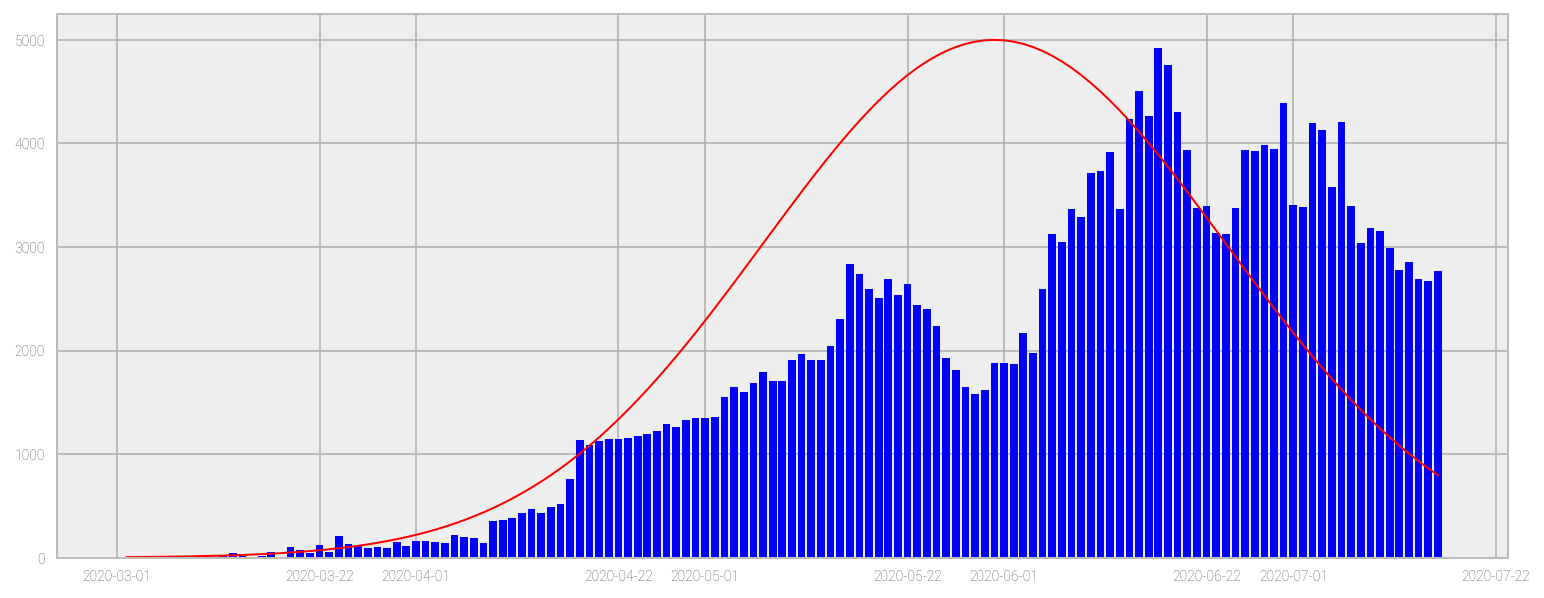

In [46]:
fig, ax = plt.subplots(figsize=(13,5))
ax.bar(dfConfirmed["Date"], dfConfirmed["new_cases"].values, color="b")
ax.plot(dfConfirmed["Date"], y_gaussian, color="red")
plt.show()

In [47]:
dfConfirmed

,Date,Confirmed,Recovered,Deaths,active,new_cases,new_Recovered
40,2020-03-02,1,0,0,1,1,0
41,2020-03-03,1,0,0,1,0,0
42,2020-03-04,1,0,0,1,0,0
43,2020-03-05,5,0,0,5,4,0
44,2020-03-06,5,0,0,5,0,0
...,...,...,...,...,...,...,...
172,2020-07-12,232259,NaN,NaN,NaN,2779,NaN
173,2020-07-13,235111,NaN,NaN,NaN,2852,NaN
174,2020-07-14,237803,NaN,NaN,NaN,2692,NaN
175,2020-07-15,240474,NaN,NaN,NaN,2671,NaN


In [48]:
from seirsplus.models import *
# ! pip3 install seirsplus

In [49]:
model = SEIRSModel(beta=0.155, sigma=1/3.2, gamma=1/12.39, initN=30000000, initI=1,
                   beta_D=0.100, sigma_D=1/4.0, gamma_D=1/9.0, theta_E=0.02, theta_I=0.02, psi_E=1.0, psi_I=1.0)

In [50]:
# model = SEIRSModel(initN   =30000000,
#                    beta    =.147, 
#                    sigma   =1/5.2, 
#                    gamma   =1/12.39, 
#                    mu_I    =0.0004,
#                    mu_0    =0, 
#                    nu      =0, 
#                    xi      =0,
#                    beta_D  =.147, 
#                    sigma_D =1/5.2, 
#                    gamma_D =1/12.39, 
#                    mu_D    =0.0004,
#                    theta_E =0, 
#                    theta_I =0, 
#                    psi_E   =1.0, 
#                    psi_I   =1.0,
#                    initI   =50000, 
#                    initE   =0, 
#                    initD_E =0, 
#                    initD_I =0, 
#                    initR   =0, 
#                    initF   =0)

In [51]:
checkpoints = {'t':       [10, 30], 
               'beta':    [0.1, 0.155], 
               'theta_E': [0.02, 0.02]
              }

In [52]:
model.run(T=700, checkpoints=checkpoints)
# model.run(T=500)

[Checkpoint: Updating parameters]
t = 9.90
[Checkpoint: Updating parameters]
t = 29.90


True

In [53]:
# type(model.total_num_infections())
# model.total_num_infections().tolist()

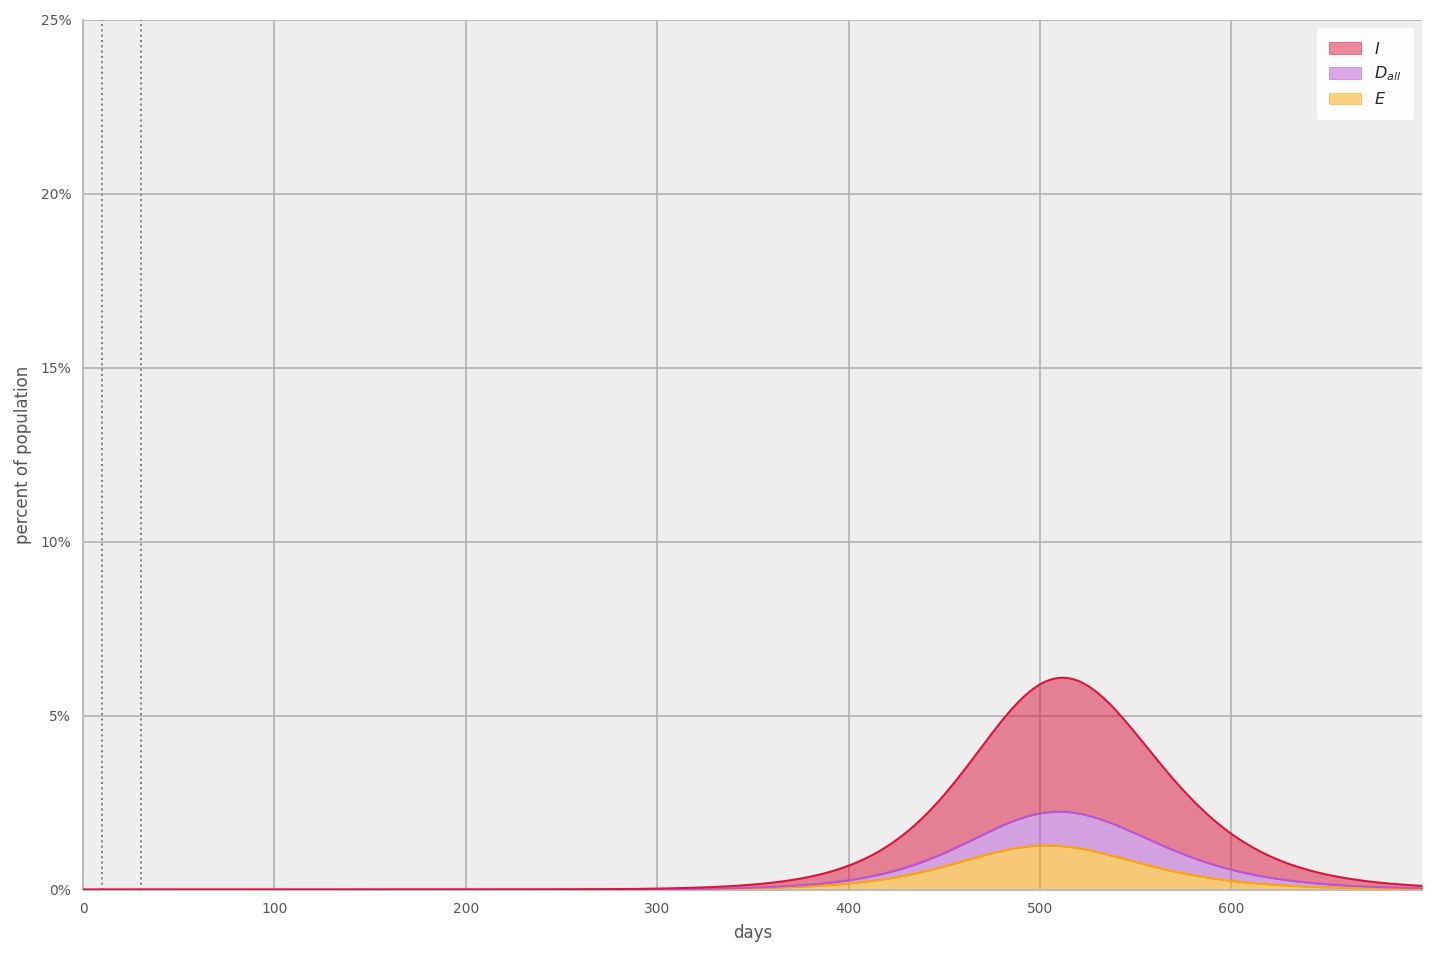

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb998c89320>)

In [54]:
model.figure_infections(vlines=checkpoints['t'], ylim=0.25)
# model.figure_infections(ylim=0.25)

In [55]:
from scipy.optimize import minimize
from datetime import datetime, timedelta

In [56]:
# gaussian dist.


In [57]:
# start_date = datetime.strptime(start, '%b %d')
test=dfConfirmed['new_cases']
data = np.nan_to_num(np.array(test).astype(float))
x_val = list(range(len(data)))

In [58]:
# Fit normal distribution by minimizing sum-of-square-error
def fit(params):
    mean, std, height = params
    y = norm.pdf(x_val, mean, std) * height
    return np.square(data - y[:len(data)]).sum() # SSE

param0 = [x_val[-1], len(data), max(data)]
res = minimize(fit, param0, method='nelder-mead', options={'xatol': 1e-7, 'disp': True})

mean, std, height = res.x
np.array([mean, std, height]).round(2)

Optimization terminated successfully.
         Current function value: 26060359.775384
         Iterations: 263
         Function evaluations: 509


array([1.150800e+02, 3.756000e+01, 3.419016e+05])

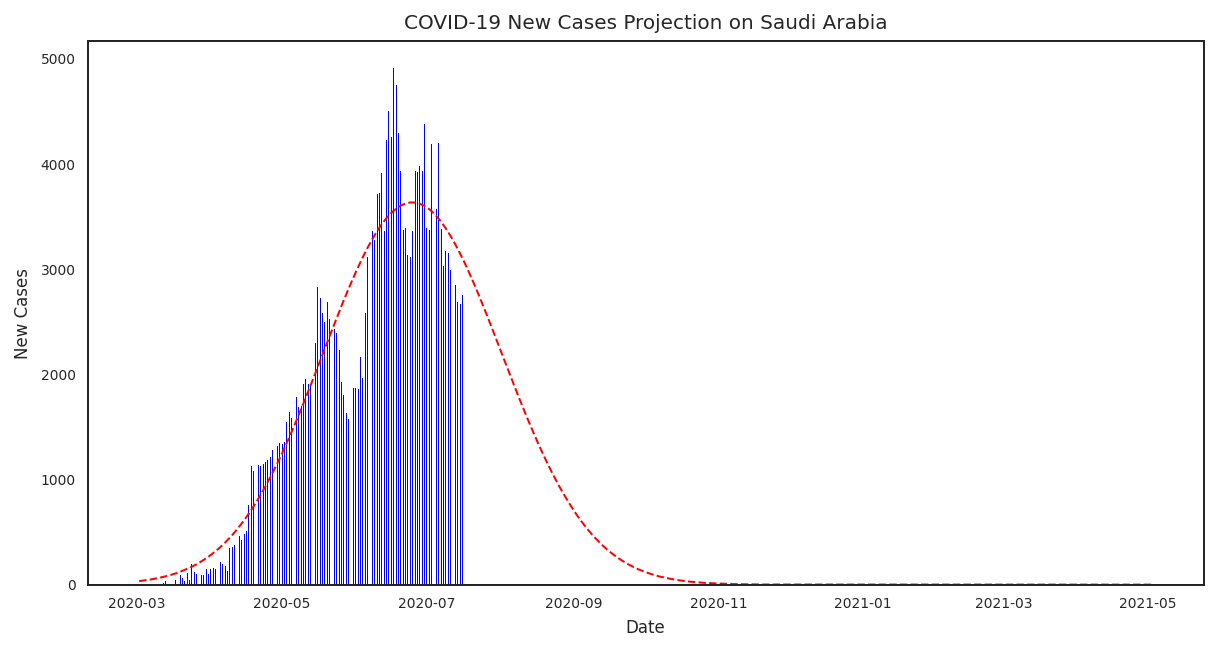

Current Actual: 243,238
Total with Projected: 340,331
0.97 % Cases Before: Sep-06


In [59]:
# X-axis and Dates
x_full = list(range(data.argmax()*4))
d_full = [dfConfirmed['Date'].iloc[0] + timedelta(days=x) for x in x_full]
as_of_date = datetime.strftime(d_full[len(data)-1], '%b-%d')

# Forecast based on fit
y_line = (norm.pdf(x_full, mean, std) * height).astype(int)
y_bar = y_line.copy()
y_bar[:len(data)] = 0

# Find the percentile
percentile = 0.97
s = y_line.sum() * percentile
i = 0
c = 0
while c < s:
    c += y_line[i] if i >= len(data) else data[i]
    i += 1
d_percentile = d_full[i-1]

# Plot
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(d_full[:len(data)], data, color='b',label='Actual')
# ax.bar(d_full, y_bar, color='black', label='Projected')
ax.plot(d_full, y_line, 'r--', label='Normal Distribution')

plt.title('COVID-19 New Cases Projection on Saudi Arabia')
plt.xlabel('Date')
plt.ylabel('New Cases')


plt.show()

print('Current Actual: {:,.0f}'.format(sum(data)))
print('Total with Projected: {:,.0f}'.format(sum(data) + sum(y_line[len(data):])))
print('{} % Cases Before: {}'.format(percentile,datetime.strftime(d_full[i], '%b-%d')))

In [60]:
# df.loc[df['Date']==d_full[len(data)-1]]
# date_list = [base - datetime.timedelta(days=x) for x in range(1)]
# date_list


In [61]:
# for i in d_full:
#     idx = d_full[len(data)-1]
#     date_list = [idx + datetime.timedelta(days=x) for x in range(10)]
#     break
# date_list
# # d_full==d_full[len(data)-1]

In [62]:
prediction = pd.DataFrame([data,d_full, y_line])

In [63]:
# df.tail()
normalCurve=prediction.T

In [64]:
normalCurve

,0,1,2
0,1,2020-03-02,33
1,0,2020-03-03,36
2,0,2020-03-04,39
3,4,2020-03-05,42
4,0,2020-03-06,45
...,...,...,...
423,None,2021-04-29,0
424,None,2021-04-30,0
425,None,2021-05-01,0
426,None,2021-05-02,0


In [65]:
normalCurve=normalCurve.rename(columns={normalCurve.columns[0]: 'Actual New Cases',normalCurve.columns[1]: 'Date', normalCurve.columns[2]: 'Predicted New Cases'})

In [66]:
idx = normalCurve[normalCurve['Actual New Cases'].isnull() == True].index.tolist()[0]
normalCurve = normalCurve[:idx]
y_pred = normalCurve['Predicted New Cases']
y_true = normalCurve['Actual New Cases']
# y_pred

In [67]:
# print(y_pred)
# print(y_true)
# normalCurve=normalCurve[normalCurve['Predicted New Cases']!=0]

In [68]:
normalCurve.iloc[50:150]

,Actual New Cases,Date,Predicted New Cases
50,1147,2020-04-21,809
51,1141,2020-04-22,847
52,1158,2020-04-23,886
53,1172,2020-04-24,926
54,1197,2020-04-25,968
...,...,...,...
132,2779,2020-07-12,3280
133,2852,2020-07-13,3240
134,2692,2020-07-14,3198
135,2671,2020-07-15,3154


In [69]:
normalCurve

,Actual New Cases,Date,Predicted New Cases
0,1,2020-03-02,33
1,0,2020-03-03,36
2,0,2020-03-04,39
3,4,2020-03-05,42
4,0,2020-03-06,45
...,...,...,...
132,2779,2020-07-12,3280
133,2852,2020-07-13,3240
134,2692,2020-07-14,3198
135,2671,2020-07-15,3154


In [70]:
# normalCurve.to_csv('normalCurve.csv')
# mean_squared_error(y_true,y_pred) 

In [71]:
len(data)

137

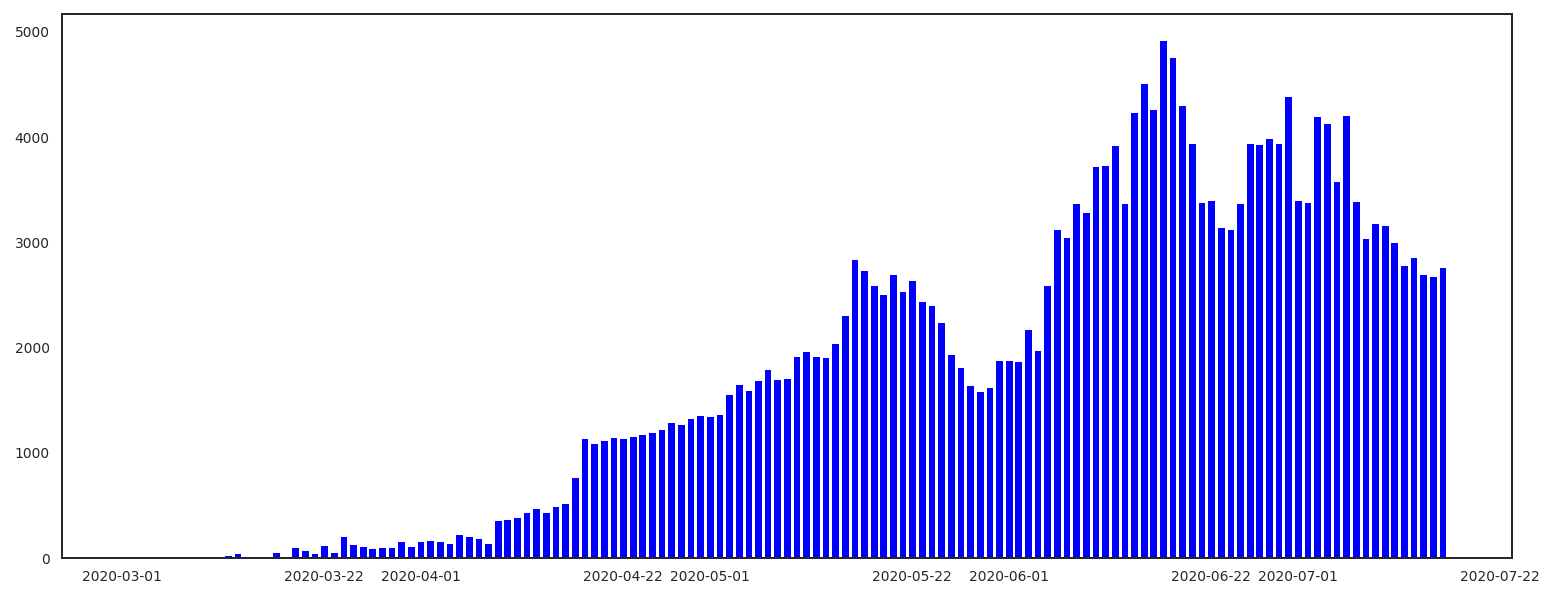

In [72]:
fig, ax = plt.subplots(figsize=(13,5))
ax.bar(d_full[:len(data)], data, color="b")
# ax.plot(dfConfirmed["Date"], y_gaussian, color="red")
plt.show()

In [73]:
from pygrowthmodels import generalised_richard
from scipy.optimize import curve_fit
from datetime import datetime, date, time, timedelta

In [74]:
df = result[['Date','new_cases','Confirmed']]

In [75]:
df = df[df['Confirmed'] != 0]
df = df.reset_index()
df = df.rename(columns={df.columns[0]: 't'})

df = df.iloc[1:]
df

,t,Date,new_cases,Confirmed
1,41,2020-03-03,0,1
2,42,2020-03-04,0,1
3,43,2020-03-05,4,5
4,44,2020-03-06,0,5
5,45,2020-03-07,0,5
...,...,...,...,...
132,172,2020-07-12,2779,232259
133,173,2020-07-13,2852,235111
134,174,2020-07-14,2692,237803
135,175,2020-07-15,2671,240474


In [76]:
import datetime
from scipy.stats import linregress
from scipy import stats

x_seq = np.arange(df['Date'].size)
df['new_cases'] = df['new_cases'].astype(float)
fit = np.polyfit(x_seq, df['new_cases'], 1)

fit[0]

34.04151280950337

In [77]:
#Time
days = 325
predictedDays = pd.date_range(df['Date'].iloc[-1] + datetime.timedelta(days=1), periods=days, freq='D')
X = np.append(df['Date'], predictedDays)

In [78]:
def richard(time, alpha, beta, rate, slope):
    """
    Computes the Richard growth model
    Parameters
    ----------
    time : time
    alpha : upper asymptote
    beta : growth range
    rate : growth rate
    slope : slope of growth
    See Also
    --------
    richard_inverse
    References
    ----------
    .. [1] D. Fekedulegn, M. Mac Siurtain, and J. Colbert, "Parameter estimation
           of nonlinear growth models in forestry," Silva Fennica, vol. 33, no.
           4, pp. 327-336, 1999.
    """

    result = (1 + beta * np.exp(-rate * time))
    for i in range (len(result)):
        if (result[i] < 0) & ( slope > 1):
            result = float('nan')
    else:

        result = result ** (1 / slope)

        result = alpha / result
        

    return result

In [79]:
# def richard_inverse(size, alpha, beta, rate, slope):

#     """

#     Computes the inverse of Richard growth model



#     Parameters

#     ----------

#     size : size

#     alpha : upper asymptote

#     beta : growth range

#     rate : growth rate

#     slope : slope of growth



#     See Also

#     --------

#     richard



#     References

#     ----------

#     .. [1] A. Khamiz, Z. Ismail, and A. T. Muhammad, "Nonlinear growth models

#            for modeling oil palm yield growth," Journal of Mathematics and

#            Statistics, vol. 1, no. 3, p. 225, 2005.

#     """



#     result = -np.log(((alpha / size) ** slope - 1) / beta) / rate



#     return result

In [80]:
def generalised_richard(time, A, U, k, m, beta, t0=0):
    """
    Computes the Generalised Richard growth model
    Parameters
    ----------
    time : time
    A : the lower asymptote
    U : the upper asymptote
    k : growth range
    m : slope of growth
    beta : growth range
    t0 : time shift (default 0)
    See Also
    --------
    generalised_richard_inverse
    References
    ----------
    .. [1] D. Fekedulegn, M. Mac Siurtain, and J. Colbert, "Parameter estimation
           of nonlinear growth models in forestry," Silva Fennica, vol. 33, no.
           4, pp. 327-336, 1999.
    """
    
    result = A + richard(time - t0, U - A, beta, k, m)

    return result

In [81]:
# def generalised_richard_inverse(size, A, U, k, m, beta, t0=0):

#     """

#     Computes the inverse of Generalised Richard growth model



#     Parameters

#     ----------

#     size : size

#     A : the lower asymptote

#     U : the upper asymptote

#     k : growth range

#     m : slope of growth

#     beta : growth range

#     t0 : time shift (default 0)



#     See Also

#     --------

#     generalised_richard



#     References

#     ----------

#     .. [1] A. Khamiz, Z. Ismail, and A. T. Muhammad, "Nonlinear growth models

#            for modeling oil palm yield growth," Journal of Mathematics and

#            Statistics, vol. 1, no. 3, p. 225, 2005.

#     """



#     result = richard_inverse(size - A, U - A, beta, k, m) + t0



#     return result

In [82]:
# t = np.linspace(0, len(dfConfirmed2), len(dfConfirmed2))

In [83]:
popt, pcov = curve_fit(generalised_richard, df.index.values, df.Confirmed.values, method='lm', maxfev=8000)

In [84]:
popt

array([-1.12156899e+03,  6.17880916e+05,  1.66176652e-02,  5.02757559e-04,
        1.38038490e-01, -2.07668320e+02])

In [85]:
# a, b, c , d, f, g= popt

In [86]:
# pred = generalised_richard(df.index,a,b,c,d,f,g)

In [87]:
# days = 180
# predictedDays = pd.date_range(df['Date'].iloc[-1] + datetime.timedelta(days=1), periods=days, freq='D')
# X = np.append(df['Date'], predictedDays)

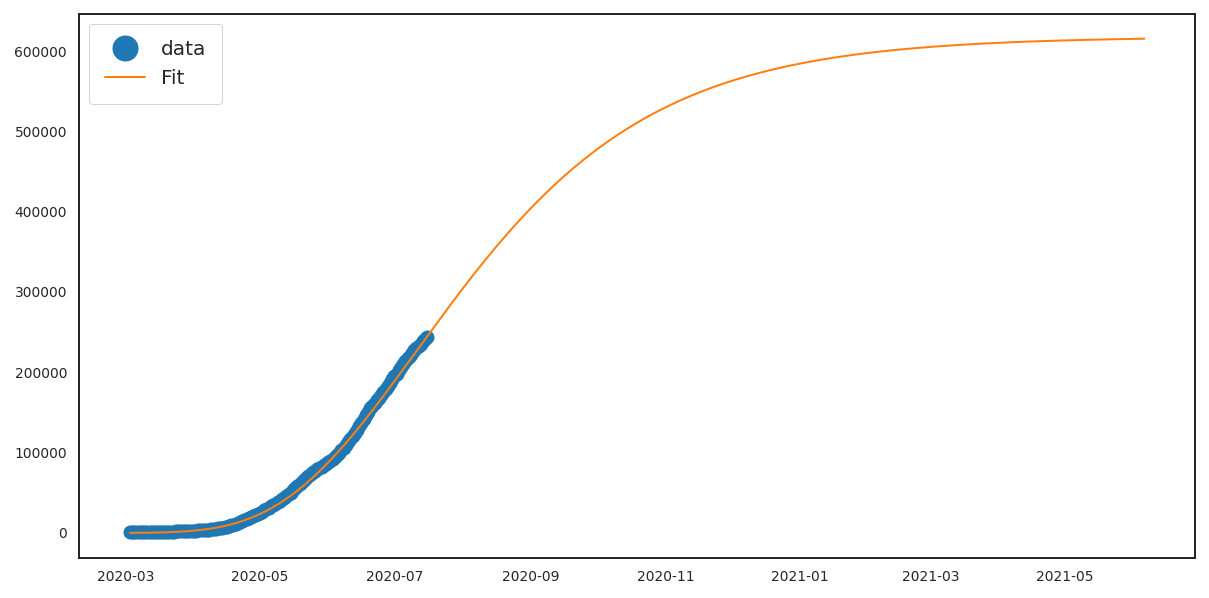

In [88]:
x_min = 0
x_max = 460                               #min/max values for x axis
x_fit = np.linspace(x_min, x_max, 461)   #range of x values used for the fit function

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df.Date, df.Confirmed, 'o', label='data')
ax.plot(X, generalised_richard(x_fit, *popt), '-', label='Fit')

plt.legend()
plt.show()

In [89]:
# nonlinear model
df.dtypes

t                     int64
Date         datetime64[ns]
new_cases           float64
Confirmed            object
dtype: object

In [90]:
gRichard=generalised_richard(x_fit, *popt).astype(int)

In [91]:
# gRichard

In [92]:
prediction = pd.DataFrame([X,gRichard])

In [93]:
prediction.T

,0,1
0,2020-03-03,-1017
1,2020-03-04,-1001
2,2020-03-05,-983
3,2020-03-06,-962
4,2020-03-07,-939
...,...,...
456,2021-06-02,615128
457,2021-06-03,615173
458,2021-06-04,615218
459,2021-06-05,615262


In [94]:
dfRich = prediction.T

In [95]:
# dfRich.dtypes

In [96]:
dfRich=dfRich.rename(columns={dfRich.columns[0]: 'Date',dfRich.columns[1]: 'Accumulative'})

In [97]:
dfRich['New Cases']=dfRich['Accumulative'].diff()
dfRich['New Cases']=dfRich['New Cases'].astype(float)

In [98]:
dfRich[130:140]

,Date,Accumulative,New Cases
130,2020-07-11,225761,3783.0
131,2020-07-12,229544,3783.0
132,2020-07-13,233326,3782.0
133,2020-07-14,237107,3781.0
134,2020-07-15,240885,3778.0
135,2020-07-16,244658,3773.0
136,2020-07-17,248428,3770.0
137,2020-07-18,252191,3763.0
138,2020-07-19,255948,3757.0
139,2020-07-20,259697,3749.0


In [99]:
dfRich.Date = pd.to_datetime(dfRich.Date)
dfRich.set_index('Date', inplace=True)

Text(0, 0.5, 'New Cases')

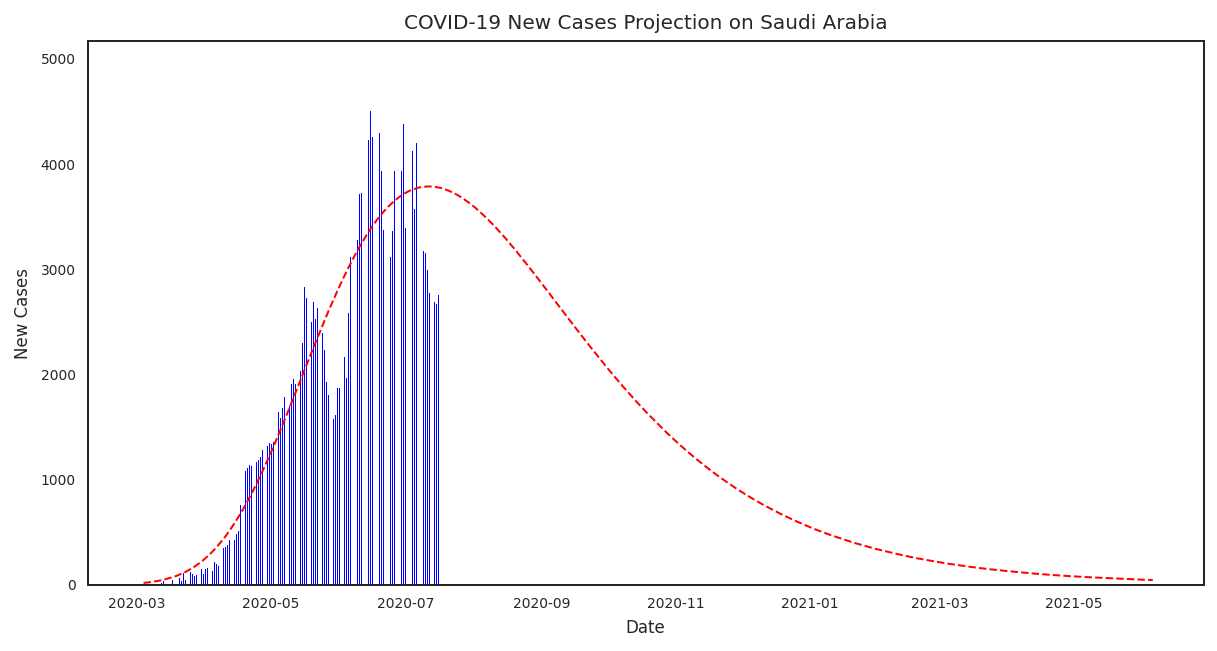

In [100]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(d_full[:len(data)], data, color='b',label='Actual')
# ax.bar(d_full, y_bar, color='black', label='Projected')
ax.plot(dfRich.index, dfRich['New Cases'], 'r--', label='Normal Distribution')

plt.title('COVID-19 New Cases Projection on Saudi Arabia')
plt.xlabel('Date')
plt.ylabel('New Cases')

In [101]:
def Rich(t, theta1, theta2, theta3,theta4):

    f = (theta1 * (1 - np.exp(-theta2 * np.exp(theta3 * t))**theta4))
    #    dydt = r (Y ** p) * (1 - (Y / K) ** alpha)

#     f = -(theta1* theta2 * (theta3**(theta4-1))) * t
#     𝑟𝑟 𝛼𝛼 𝐾𝐾𝑝𝑝−1
    return f

In [102]:
popt, pcov = curve_fit(Rich, df.index.values, df.Confirmed.values, maxfev = 8000)

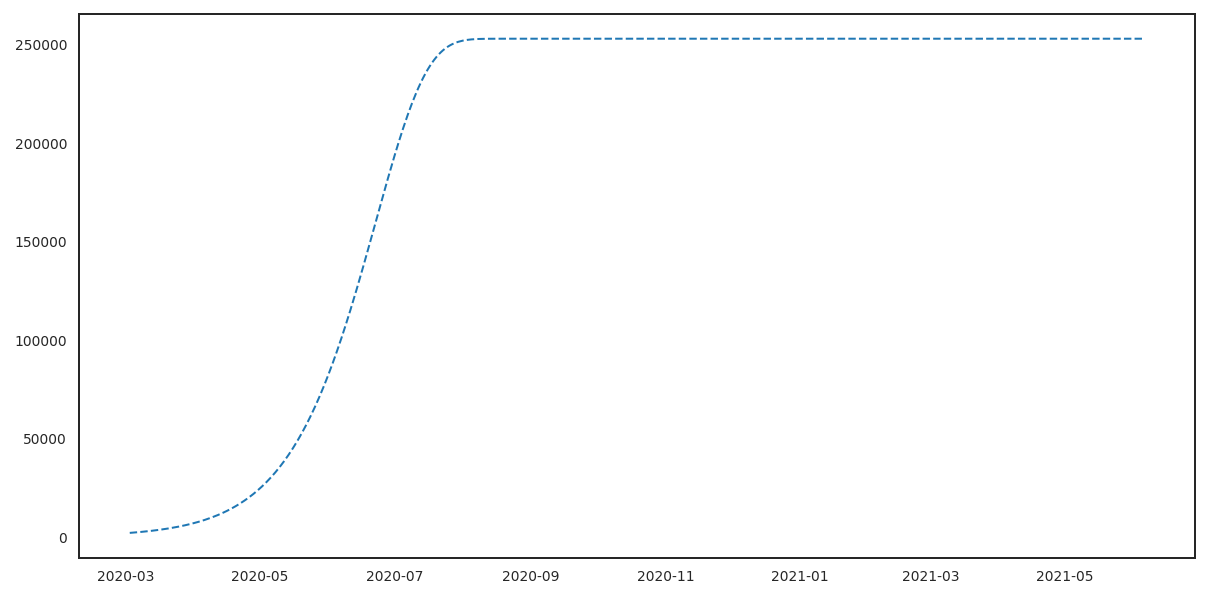

In [103]:
plt.plot(X, Rich(x_fit, *popt), '--', label='Fit')
# # plt.plot(df.Date, df.Confirmed, '-', label='data')
# plt.show()

In [104]:
def diff(Y, t, r, p, K, alpha):
    return r * (Y ** p) * (1 - (Y / K) ** alpha)

# def fun(params):
#     Y, r, p, K, alpha = params
#     return r * (Y ** p) * (1 - (Y / K) ** alpha)
#Returns residual: predicted - actual
def fun(p, x, y):
    return model(p, x) - y

In [105]:
test = dfConfirmed['Confirmed']
data = np.nan_to_num(np.array(test).astype(float))
x_val = list(range(len(data)))

In [106]:
# def obj(arguments)
#     """objective function, to be solved."""
#     x, arg_1, arg_2 = arguments[0], arguments[1], arguments[2] 
#     v_3 = f(x, arg_1, arg_2)
#     return abs(x-v_3)

# x0 = 1
# initial_guess = [1,1,1]  # initial guess can be anything
# result = minimize(obj, initial_guess)
# print result.x

In [107]:
# def fit(param):
#     Y,r, p, K, alpha = param
#     yy = (r * (Y ** p) * (1 - (Y / K) ** alpha))
#     return np.square(data - yy).sum()

In [108]:
# param0 = [1,0.5, 0.5, 400000,0.5]
# res = minimize(fit, param0, bounds=bnds)

In [109]:
# res.x

In [110]:
# from scipy.optimize import minimize

# bnds = ((1., np.inf), (0.01, 2.0),(0,1.1),(250000,600000),(0,1))
# initial_guess = [1,0.01, 0.5, 400000,0.]
# #scipy.optimize.minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None
# result = minimize(fun,initial_guess, method='TNC', bounds=bnds)
# Y,r,p,K,alpha=result.x

In [111]:
# Y, r, p, K, alpha
t

array([  0.        ,   1.00201613,   2.00403226,   3.00604839,
         4.00806452,   5.01008065,   6.01209677,   7.0141129 ,
         8.01612903,   9.01814516,  10.02016129,  11.02217742,
        12.02419355,  13.02620968,  14.02822581,  15.03024194,
        16.03225806,  17.03427419,  18.03629032,  19.03830645,
        20.04032258,  21.04233871,  22.04435484,  23.04637097,
        24.0483871 ,  25.05040323,  26.05241935,  27.05443548,
        28.05645161,  29.05846774,  30.06048387,  31.0625    ,
        32.06451613,  33.06653226,  34.06854839,  35.07056452,
        36.07258065,  37.07459677,  38.0766129 ,  39.07862903,
        40.08064516,  41.08266129,  42.08467742,  43.08669355,
        44.08870968,  45.09072581,  46.09274194,  47.09475806,
        48.09677419,  49.09879032,  50.10080645,  51.10282258,
        52.10483871,  53.10685484,  54.10887097,  55.1108871 ,
        56.11290323,  57.11491935,  58.11693548,  59.11895161,
        60.12096774,  61.12298387,  62.125     ,  63.12

In [158]:
t = np.linspace(0, len(X), len(X))
# t = np.linspace(0, X, X)

y0 = df.Confirmed.iloc[0] # Your initial condition.
params = (0.56, 0.91, 420000, .11) # r, p, K, alpha
sol = odeint(diff, y0, t, args=params)

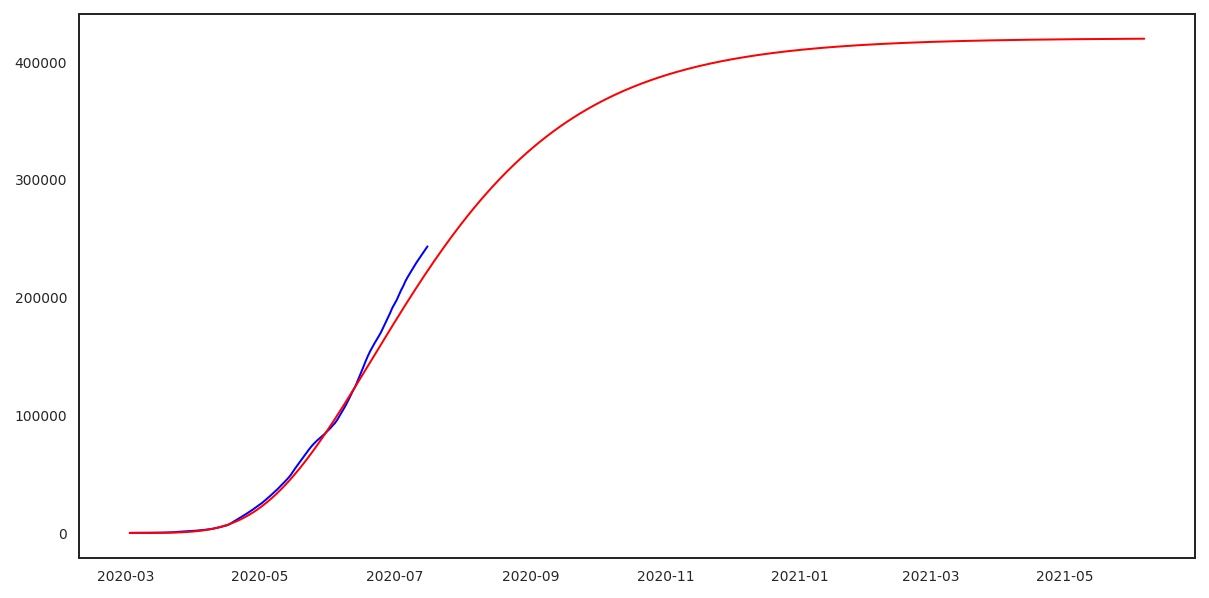

In [159]:
# r=2; p=1; K=1;  alpha=0.8;
# y0 = r, p, K, alpha
plt.plot(df.Date, df.Confirmed,'blue')
plt.plot(X, sol, 'red')

In [114]:
prediction = pd.DataFrame([X,sol])

In [115]:
pre  = prediction.T
pre=pre.rename(columns={pre.columns[0]: 'Date',pre.columns[1]: 'Accumulative'})

In [116]:
pre['Accumulative']=pre['Accumulative'].astype(int)
pre['New Cases'] = pre['Accumulative'].diff()
pre['New Cases'] = pre['New Cases'].fillna(0).astype(int)

In [117]:
pre

,Date,Accumulative,New Cases
0,2020-03-03,1,0
1,2020-03-04,1,0
2,2020-03-05,2,1
3,2020-03-06,3,1
4,2020-03-07,4,1
...,...,...,...
456,2021-06-02,399505,10
457,2021-06-03,399514,9
458,2021-06-04,399524,10
459,2021-06-05,399533,9


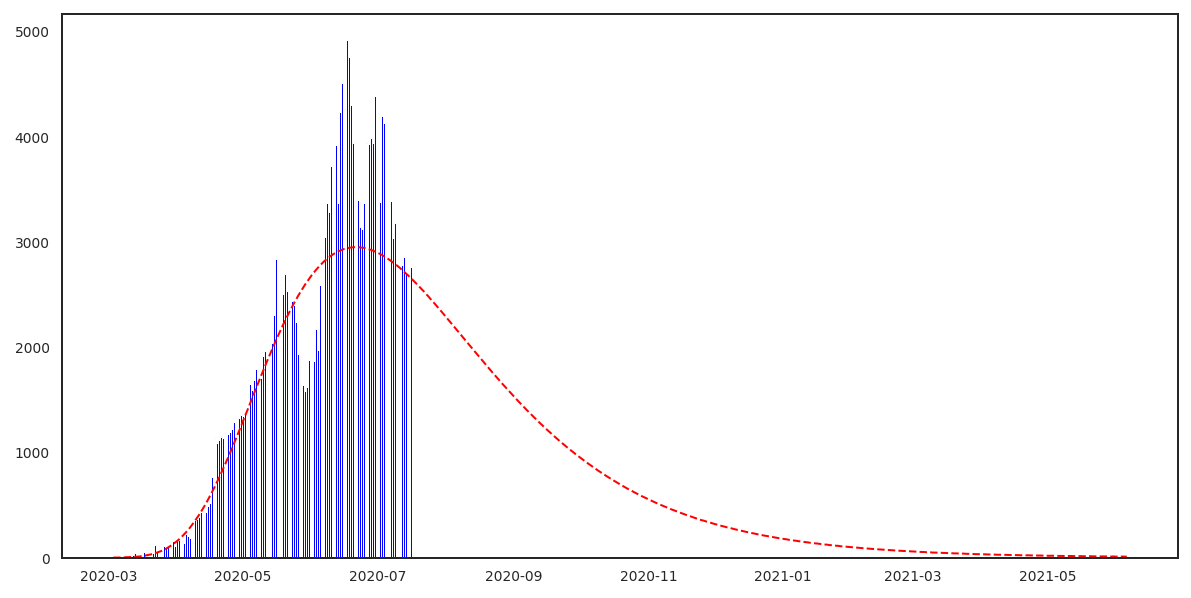

In [118]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(df['Date'], df['new_cases'], color='b',label='Actual')
ax.plot(pre['Date'], pre['New Cases'], 'r--', label='GRM')
# plt.plot(df.Date, df.new_cases, '', label='data')
plt.show()

In [119]:
# pre.to_csv('GeneralizedRichard.csv')

In [120]:
# ret = odeint(GRich, y0, t, args=(r, p, K, alpha))
# df.Confirmed.iloc[0]
# 
# prediction = pd.DataFrame([X,sol])

In [121]:
# p, K, alpha = ret.T
# plt.plot(X, ret, 'b', alpha=1., lw=2, label='Predicted')
# plt.show()
# prediction.T

In [122]:
# pre=prediction.T

In [123]:
# pre=pre.rename(columns={pre.columns[0]: 'Date',pre.columns[1]: 'Accumulative'})

In [124]:
# pre['New Cases'] = pre['Accumulative'].diff().astype(int)

In [125]:
# pre

In [126]:

# plt.rcParams["figure.figsize"] = [10, 5]

# fig = plt.figure(facecolor='w')
# ax = fig.add_subplot(111,  axisbelow=True)
# ax.plot(X, ret, 'b', alpha=1., lw=2, label='Predicted')

# plt.show()

In [127]:
# popt, pcov = curve_fit(Rich, df.index.values, df.Confirmed.values, bounds=([0, 0, 0, 0],np.inf), maxfev = 8000)

In [128]:
# popt

In [129]:
# plt.plot(X, GRich(x_fit, *popt), '--', label='Fit')
# # plt.plot(df.Date, df.Confirmed, '-', label='data')
# plt.show()

In [130]:
def Gompertz(t, theta1, theta2, theta3):


    f = theta1 * np.exp(-theta2 * np.exp(-theta3 * t))
    return f

In [131]:
# x = list(dfConfirmed2['index'])
# y = list(dfConfirmed2['Confirmed'])

popt, pcov = curve_fit(Gompertz, df.index.values, df.Confirmed.values, maxfev = 8000)

In [132]:
popt

array([5.90071802e+05, 9.05145257e+00, 1.72493356e-02])

In [133]:
X

array(['2020-03-03T00:00:00.000000000', '2020-03-04T00:00:00.000000000',
       '2020-03-05T00:00:00.000000000', '2020-03-06T00:00:00.000000000',
       '2020-03-07T00:00:00.000000000', '2020-03-08T00:00:00.000000000',
       '2020-03-09T00:00:00.000000000', '2020-03-10T00:00:00.000000000',
       '2020-03-11T00:00:00.000000000', '2020-03-12T00:00:00.000000000',
       '2020-03-13T00:00:00.000000000', '2020-03-14T00:00:00.000000000',
       '2020-03-15T00:00:00.000000000', '2020-03-16T00:00:00.000000000',
       '2020-03-17T00:00:00.000000000', '2020-03-18T00:00:00.000000000',
       '2020-03-19T00:00:00.000000000', '2020-03-20T00:00:00.000000000',
       '2020-03-21T00:00:00.000000000', '2020-03-22T00:00:00.000000000',
       '2020-03-23T00:00:00.000000000', '2020-03-24T00:00:00.000000000',
       '2020-03-25T00:00:00.000000000', '2020-03-26T00:00:00.000000000',
       '2020-03-27T00:00:00.000000000', '2020-03-28T00:00:00.000000000',
       '2020-03-29T00:00:00.000000000', '2020-03-30

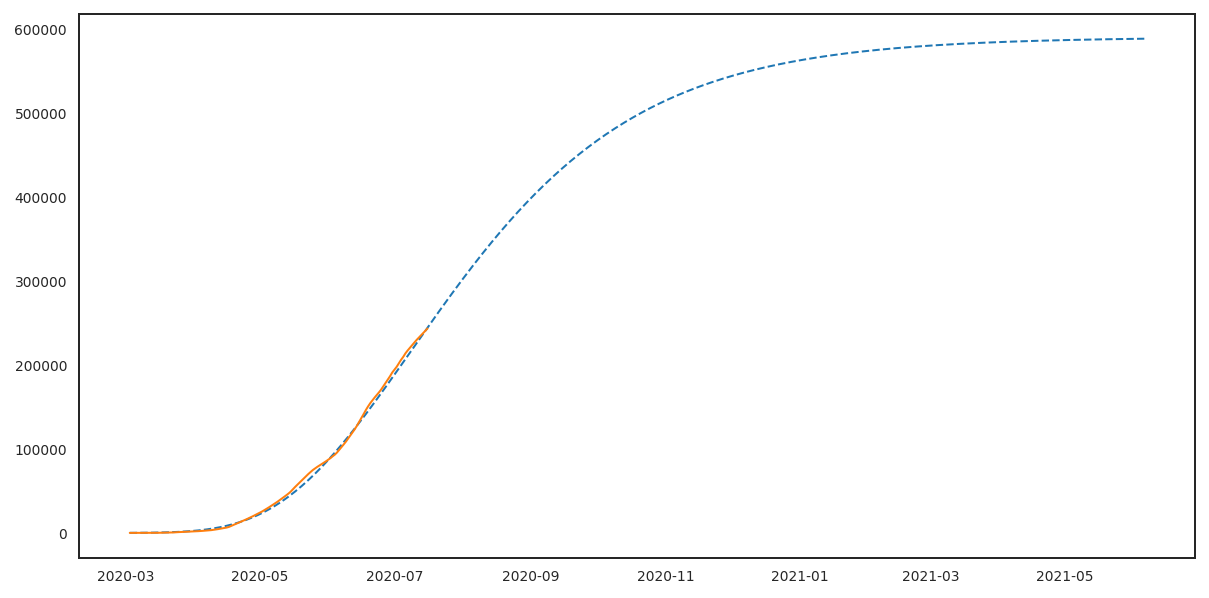

In [134]:
plt.plot(X, Gompertz(x_fit, *popt), '--', label='Fit')
plt.plot(df.Date, df.Confirmed, '-', label='data')
plt.show()

In [135]:
gmp=Gompertz(x_fit, *popt).astype(int)

In [136]:
X

array(['2020-03-03T00:00:00.000000000', '2020-03-04T00:00:00.000000000',
       '2020-03-05T00:00:00.000000000', '2020-03-06T00:00:00.000000000',
       '2020-03-07T00:00:00.000000000', '2020-03-08T00:00:00.000000000',
       '2020-03-09T00:00:00.000000000', '2020-03-10T00:00:00.000000000',
       '2020-03-11T00:00:00.000000000', '2020-03-12T00:00:00.000000000',
       '2020-03-13T00:00:00.000000000', '2020-03-14T00:00:00.000000000',
       '2020-03-15T00:00:00.000000000', '2020-03-16T00:00:00.000000000',
       '2020-03-17T00:00:00.000000000', '2020-03-18T00:00:00.000000000',
       '2020-03-19T00:00:00.000000000', '2020-03-20T00:00:00.000000000',
       '2020-03-21T00:00:00.000000000', '2020-03-22T00:00:00.000000000',
       '2020-03-23T00:00:00.000000000', '2020-03-24T00:00:00.000000000',
       '2020-03-25T00:00:00.000000000', '2020-03-26T00:00:00.000000000',
       '2020-03-27T00:00:00.000000000', '2020-03-28T00:00:00.000000000',
       '2020-03-29T00:00:00.000000000', '2020-03-30

In [137]:
prediction = pd.DataFrame([X,gmp])

In [138]:
prediction.T

,0,1
0,2020-03-03,69
1,2020-03-04,80
2,2020-03-05,94
3,2020-03-06,109
4,2020-03-07,126
...,...,...
456,2021-06-02,588026
457,2021-06-03,588061
458,2021-06-04,588095
459,2021-06-05,588129


In [139]:
gmpCurve=prediction.T

In [140]:
GompertzCruve=gmpCurve.rename(columns={gmpCurve.columns[0]: 'Date',gmpCurve.columns[1]: 'Accumulative'})

In [141]:
GompertzCruve['New Cases']=GompertzCruve['Accumulative'].diff()

In [142]:
GompertzCruve.tail(20)

,Date,Accumulative,New Cases
441,2021-05-18,587423,46
442,2021-05-19,587468,45
443,2021-05-20,587512,44
444,2021-05-21,587556,44
445,2021-05-22,587599,43
446,2021-05-23,587641,42
447,2021-05-24,587683,42
448,2021-05-25,587724,41
449,2021-05-26,587764,40
450,2021-05-27,587803,39


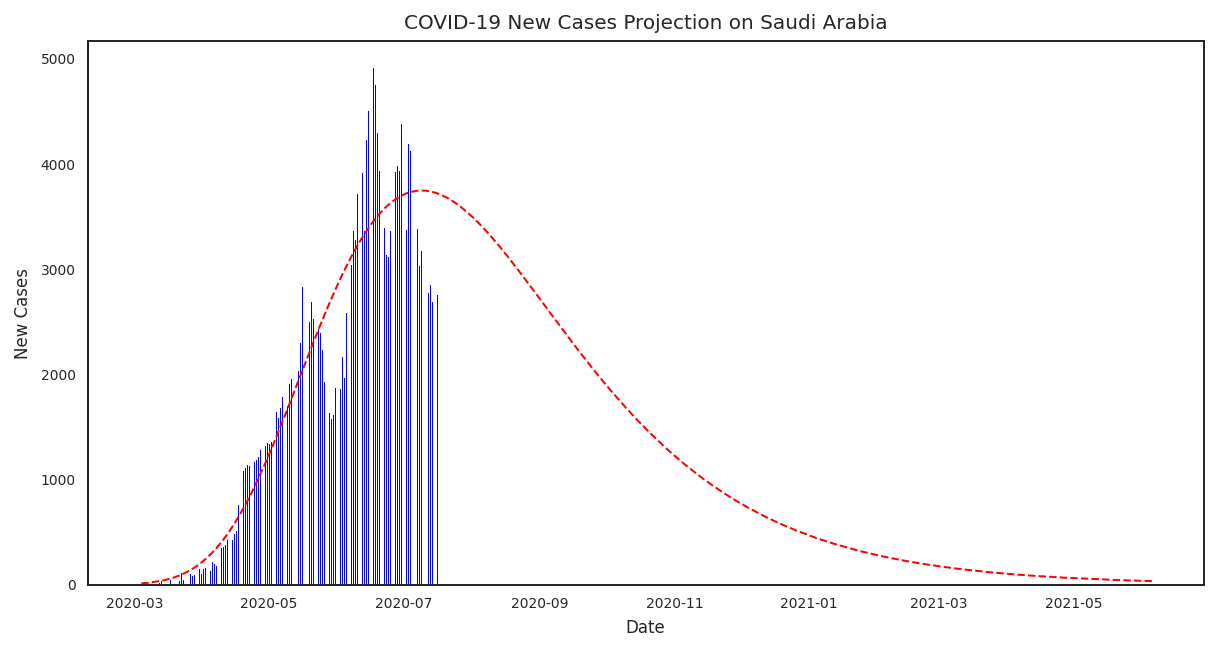

In [143]:
# GompertzCruve.plot()
# fig = plt.figure()
# GompertzCruve.set_index('Date')[['New Cases']].plot(style='.-',legend=True, grid=True)
# df.
# plt.title("COVID-19 in Saudi Arabia")
# plt.xlabel("Dates")df['Date'], df['new_cases']
# plt.ylabel("Number of cases")
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(df['Date'], df['new_cases'], color='b',label='Actual')
# ax.bar(d_full, y_bar, color='black', label='Projected')
ax.plot(GompertzCruve['Date'], GompertzCruve['New Cases'], 'r--', label='Normal Distribution')

plt.title('COVID-19 New Cases Projection on Saudi Arabia')
plt.xlabel('Date')
plt.ylabel('New Cases')


plt.show()

In [144]:
# GompertzCruve.to_csv('GompertzCruve.csv')

In [145]:
# def curve_plot(x_train, y_train, est):
#     plt.figure(figsize = (12, 5))
#     plt.xlabel('Days')
#     plt.ylabel('Cases')
#     plt.title('Saudi')
#     plt.scatter(x_train, y_train, color = 'r')
#     plt.plot(x_train, Gompertz(x_train, *est), label = 'Fitting curve (train)')
# #     plt.plot(x_test, Gompertz(x_test, *est), label = 'Fitting curve (test)')
# #     plt.axvline(x = test_start, color = 'r', linestyle = ':', label = 'test_start = %.f' % (test_start))
# #     plt.axvline(x = train_end, color = 'b', linestyle = ':', label = 'train_end = %.f' % (train_end))
#     plt.legend()
#     plt.show()

In [146]:
# curve_plot(df.index,df.Confirmed, est = popt)

In [147]:
def log_curve(x, k, x_0, ymax):
    return ymax / (1 + np.exp(-k*(x-x_0)))

In [148]:
popt, pcov = curve_fit(log_curve, df.index, df.Confirmed, bounds=([0,0,0],np.inf))

In [149]:
# plt.plot(x_fit, log_curve(x_fit, *popt), '-', label='Fit')
# plt.plot(df.index, df.Confirmed, 'o', label='data')
# plt.show()

In [150]:
# def func(x,a,b,c,d,k):
#     return k*(a/(1+(np.exp(-b*(x-c)))) + d) #logistic function.

In [151]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [152]:
# df = pd.read_csv('Analysis/All Items Long Description.csv')
# df_confirmed = pd.read_csv('Analysis/df_confirmed.csv')

In [153]:
# df.tail()

In [154]:
# df.shape

In [155]:
# len(df['Unspsc Material Group Desc'].unique())

In [156]:
# df.loc[df['Unspsc Material Group Desc'] == 'Bottles']

In [157]:
# df.loc[df['Material'] == 689260] 